In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file as dataframe df
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Removing the Serial No. column as we have an index
df = df.drop(['CustomerID'], axis=1)

In [6]:
df.shape

(200, 4)

In [7]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

0

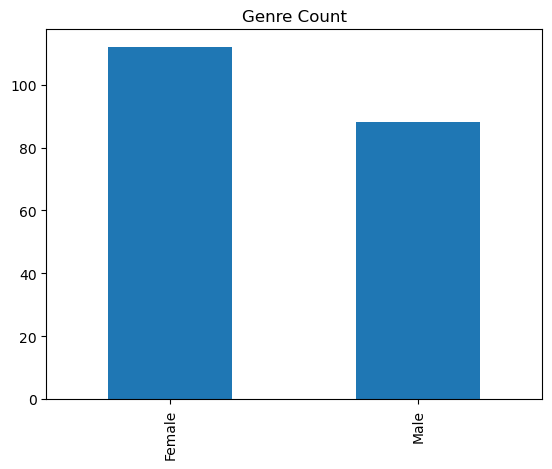

In [11]:
df.Genre.value_counts().plot(kind='bar', title="Genre Count")
plt.show()

In [22]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

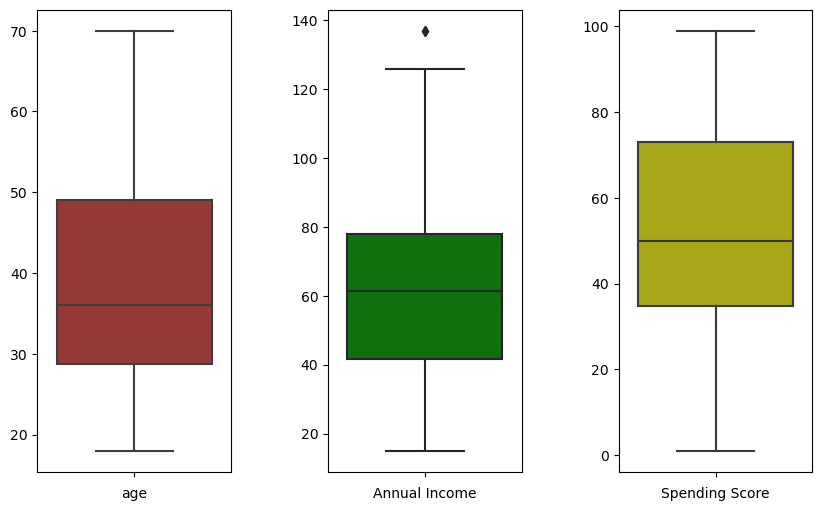

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('age')

# draw boxplot for Annual Income in the 2nd subplot
sns.boxplot(data=df['Annual Income (k$)'], ax=ax[1], color='g')
ax[1].set_xlabel('Annual Income')

# draw boxplot for Spending Score in the 3rd subplot
sns.boxplot(data=df['Spending Score (1-100)'], ax=ax[2], color='y')
ax[2].set_xlabel('Spending Score')


# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

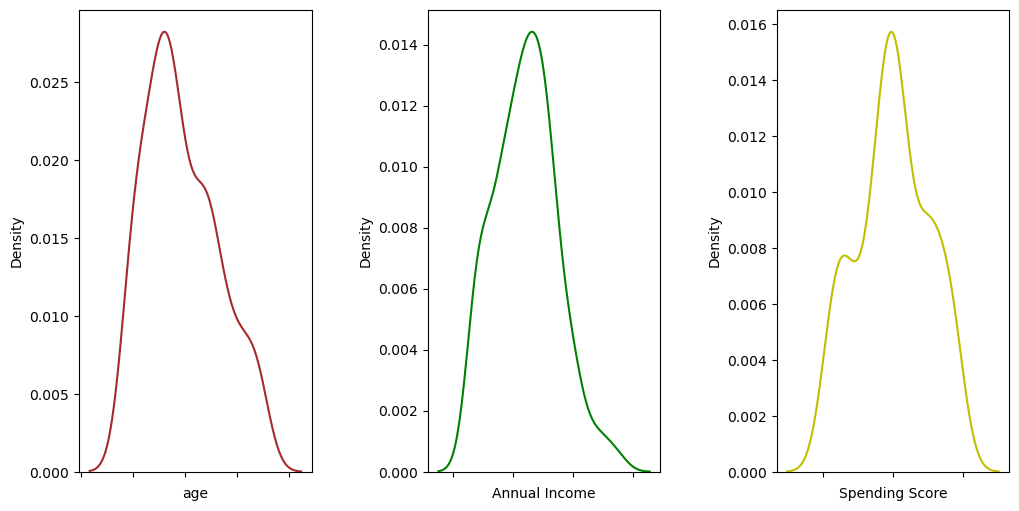

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for age in the 1st subplot
sns.kdeplot(data=df['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('age')

# draw boxplot for Annual Income in the 2nd subplot
sns.kdeplot(data=df['Annual Income (k$)'], ax=ax[1], color='g')
ax[1].set_xlabel('Annual Income')

# draw boxplot for Spending Score in the 3rd subplot
sns.kdeplot(data=df['Spending Score (1-100)'], ax=ax[2], color='y')
ax[2].set_xlabel('Spending Score')


# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

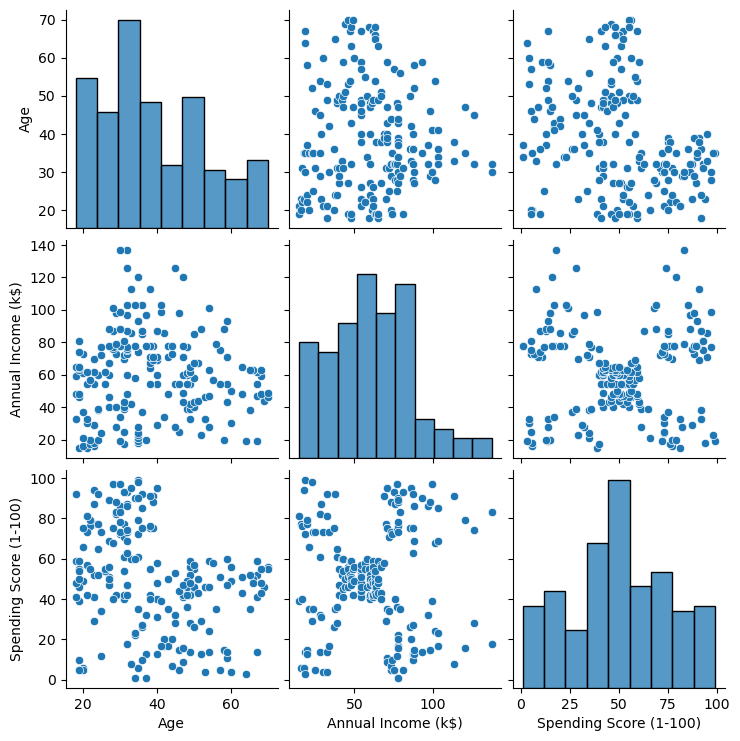

In [31]:
sns.pairplot(df,palette='Blues')

In [33]:
corr = df.corr()
corr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

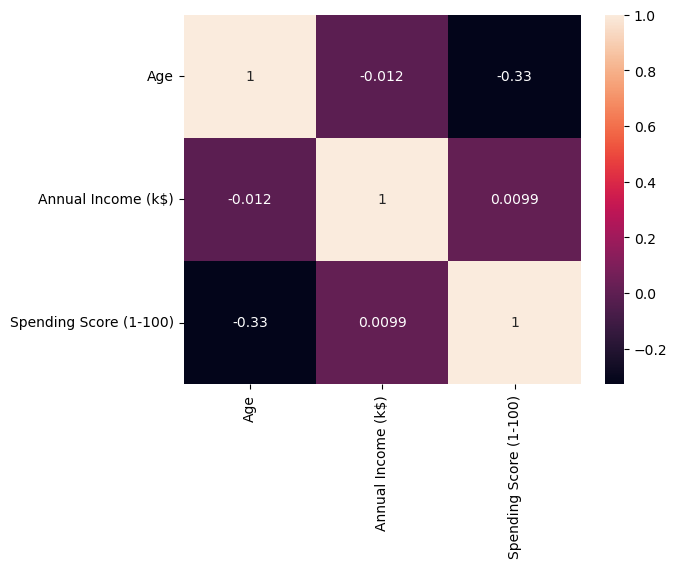

In [34]:
sns.heatmap(corr,annot=True)

### K-Means Clustering

#### Feature Scaling

In [45]:
from sklearn.cluster import KMeans

In [95]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [96]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

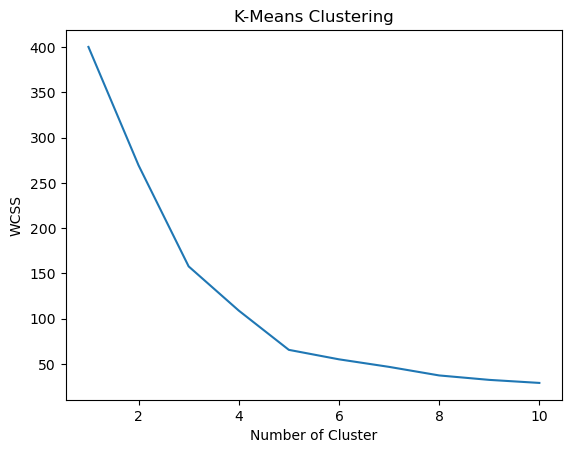

In [99]:
wcss = [] # empty list
for index in range(1,11): # range 1 to 10 implies that between this range any no. of clusters can be formed
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 10)
    kmeans.fit(X_scaled)
    
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("K-Means Clustering")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [100]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=10)

In [101]:
cluster_values = kmeans.fit_predict(X_scaled)

In [102]:
print(cluster_values)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


In [103]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [104]:
centers = kmeans.cluster_centers_

centers

array([[-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275]])

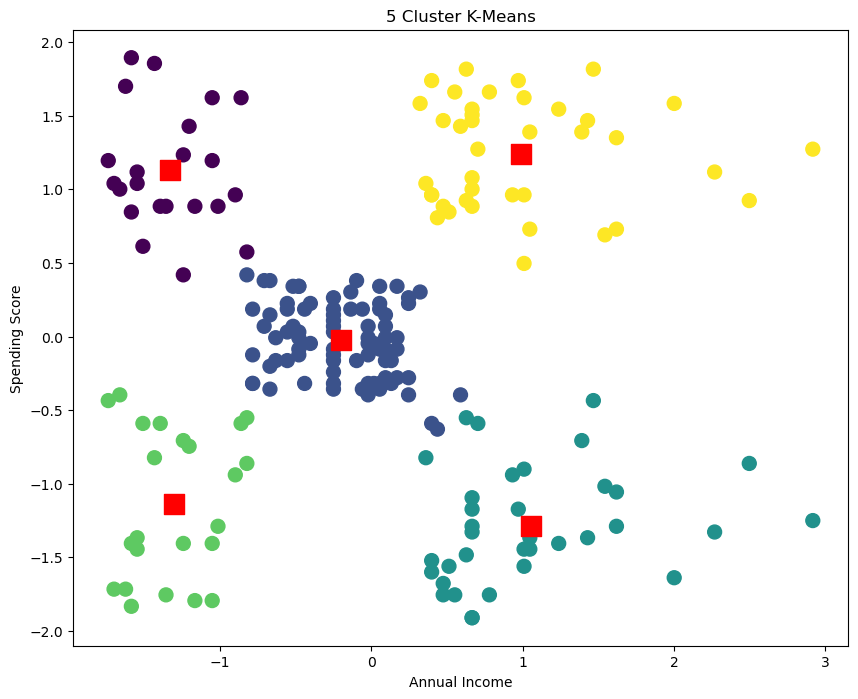

In [105]:
# Visualize the clusters
plt.figure(figsize=(10, 8))

plt.scatter(X_scaled[:,0], 
            X_scaled[:,1], 
            c=kmeans.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

### DBSCAN

In [108]:
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where

In [120]:
# define the model
model = DBSCAN(eps=0.4, min_samples=10)
# fit model and predict clusters
yhat = model.fit(X_scaled)

In [121]:
cluster_values = yhat.fit_predict(X_scaled)

In [122]:
print(cluster_values)

[-1 -1 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  1  2  1  2  3  2  3  2  1  2  3  2  3  2  3  2  3  2  1  2
  3  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  1  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3 -1  3  2 -1  2 -1  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [125]:
n_clusters = len(set(yhat.labels_)) - (1 if -1 in yhat.labels_ else 0)
n_noise = list(yhat.labels_).count(-1)

In [126]:
np.unique(yhat.labels_)

array([-1,  0,  1,  2,  3])

Text(0.5, 1.0, 'Clusters using DBScan')

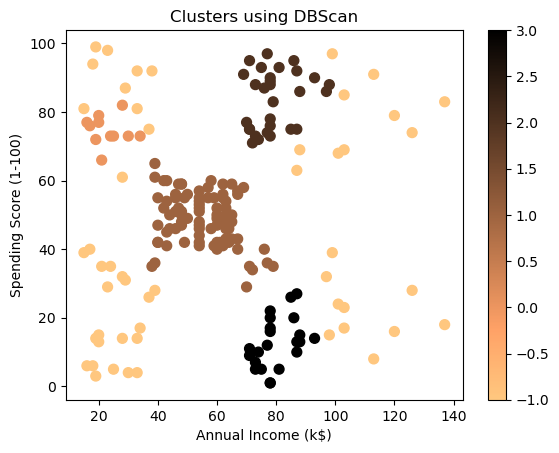

In [127]:
df.plot(x="Annual Income (k$)",y ="Spending Score (1-100)",c=yhat.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')

### Heirarchical Clustering

In [135]:
from sklearn.cluster import AgglomerativeClustering,SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

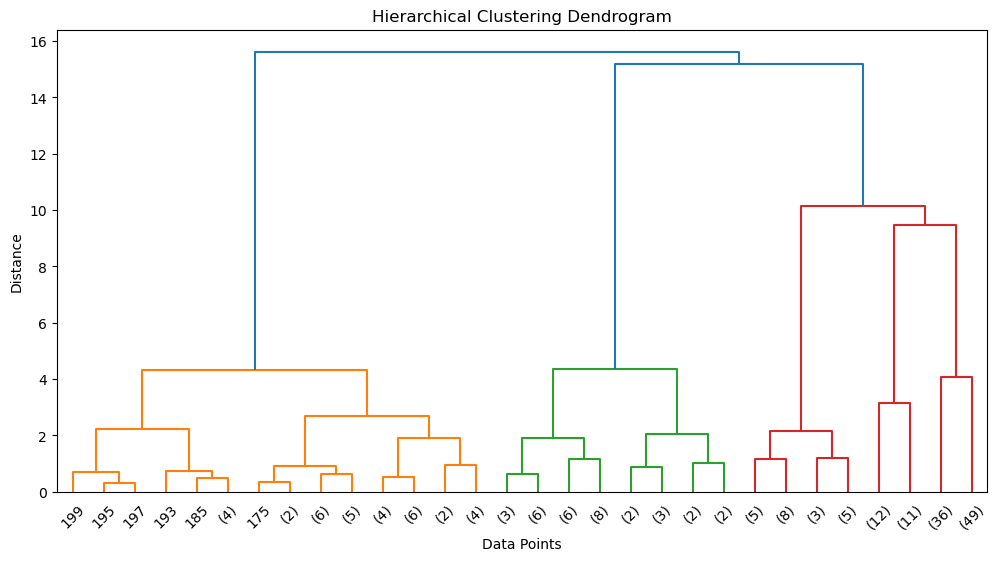

In [129]:
# Compute the linkage matrix
heir = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(heir, truncate_mode='level', p=4)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.show()

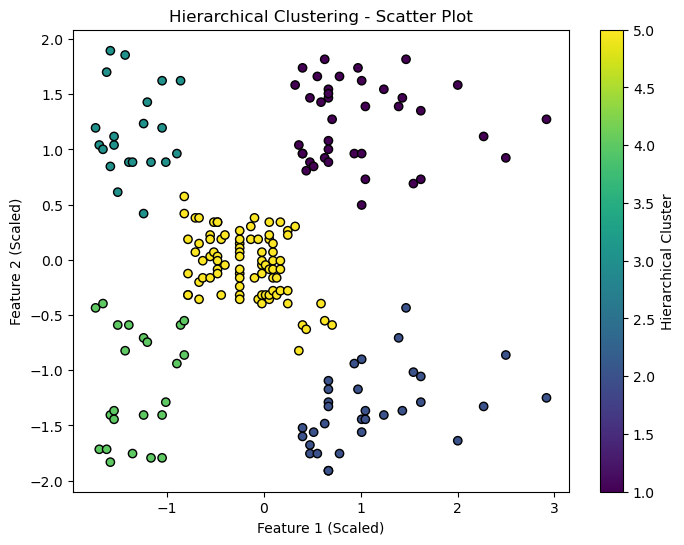

In [132]:
# Determine the hierarchical clusters
clusters = fcluster(heir, 5, criterion='maxclust')

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', edgecolor='black')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Hierarchical Clustering - Scatter Plot')
plt.colorbar(label='Hierarchical Cluster')

plt.show()

### Spectral Clustering

In [136]:
model_sc = SpectralClustering(n_clusters=5)
#
yhat_sc = model_sc.fit_predict(X_scaled)
clusters_sc = unique(yhat_sc)
print("Clusters of Mean Shift.",clusters_sc)
labels_sc = model_sc.labels_

Clusters of Mean Shift. [0 1 2 3 4]


Text(0.5, 1.0, 'Spectral Clustering')

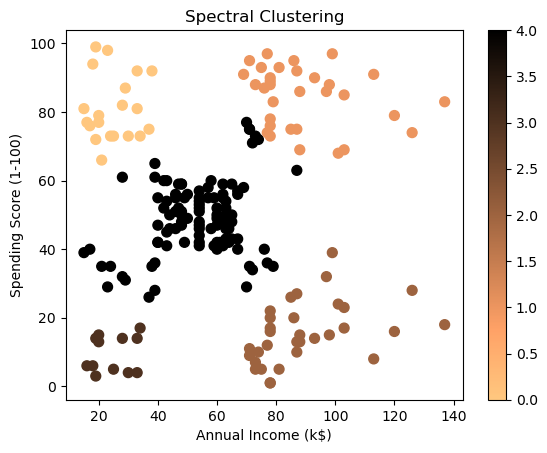

In [137]:
df.plot(x="Annual Income (k$)",y ="Spending Score (1-100)",c=labels_sc ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Spectral Clustering')

### Gaussian Mixture Model

In [139]:
from sklearn.mixture import GaussianMixture

In [145]:
model_gb = GaussianMixture(n_components=5,random_state=42)
model_gb.fit(X_scaled)

GaussianMixture(n_components=5, random_state=42)

In [146]:
gm_pred = model_gb.predict(X_scaled)

Text(0.5, 1.0, 'Gaussian Mixture')

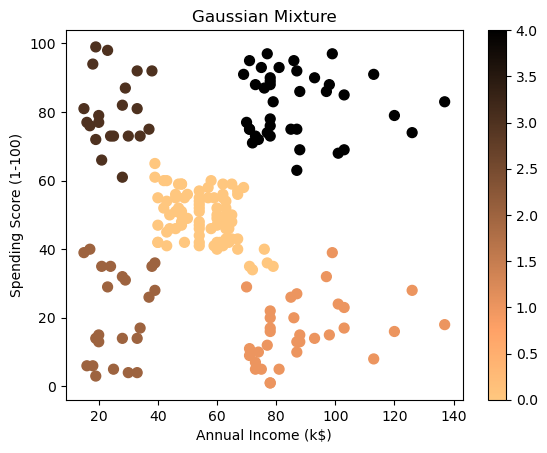

In [147]:
df.plot(x="Annual Income (k$)",y ="Spending Score (1-100)",c=gm_pred ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Gaussian Mixture')